In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the dataset
data = pd.read_csv('/content/ford.csv')

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
print(data.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


# **Data Cleaning**

In [7]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

In [8]:
# Handling missing values
if data_cleaned.isnull().sum().any():
    data_cleaned.fillna(data_cleaned.median(), inplace=True)

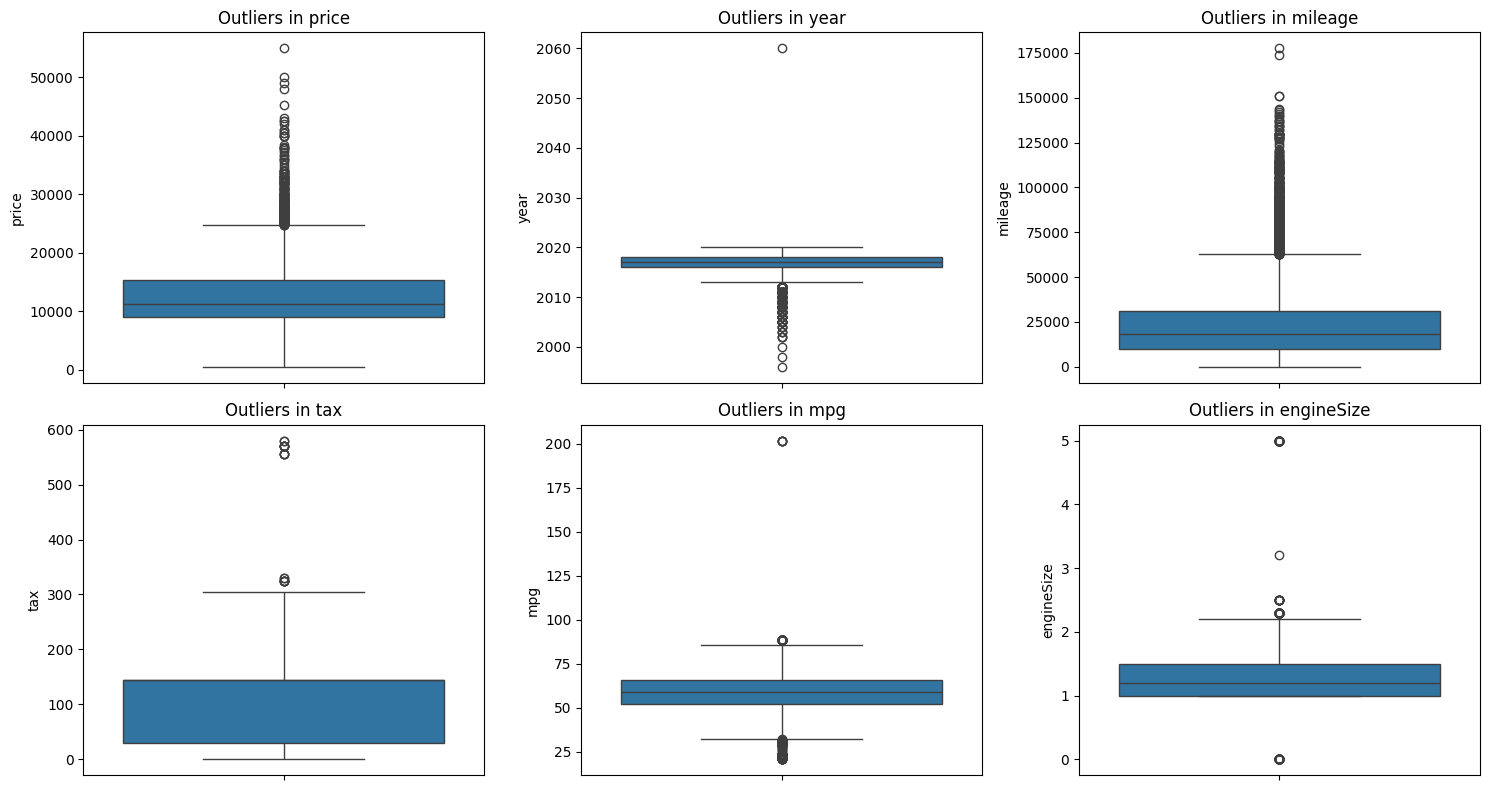

In [9]:
# Check for outliers in numerical features
numerical_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data_cleaned[feature])
    plt.title(f"Outliers in {feature}")
plt.tight_layout()
plt.show()

In [10]:
# Removing extreme outliers based on price
q1 = data_cleaned['price'].quantile(0.25)
q3 = data_cleaned['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_cleaned = data_cleaned[(data_cleaned['price'] >= lower_bound) & (data_cleaned['price'] <= upper_bound)]

# **Exploratory Data Analysis (EDA)**

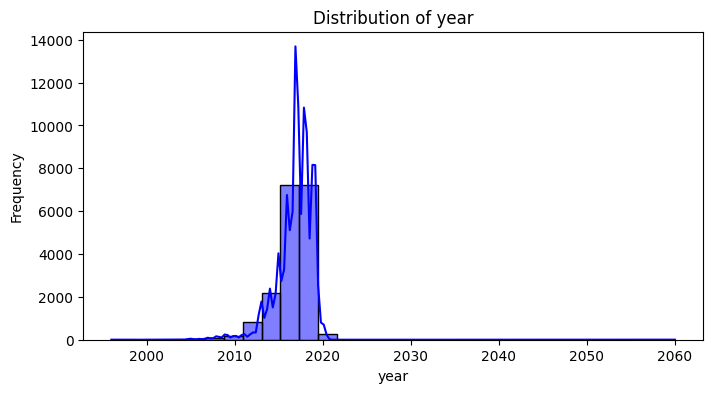

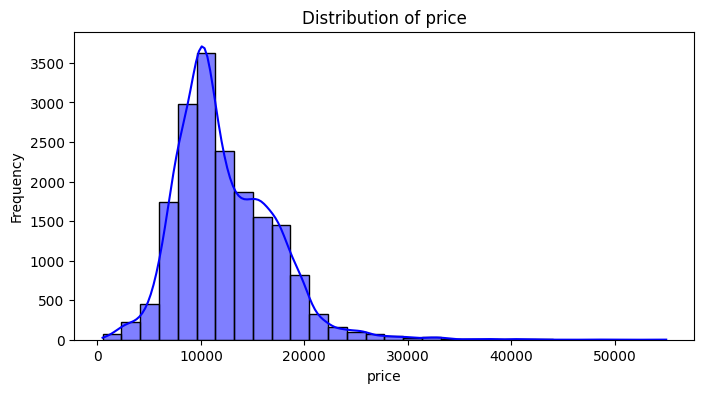

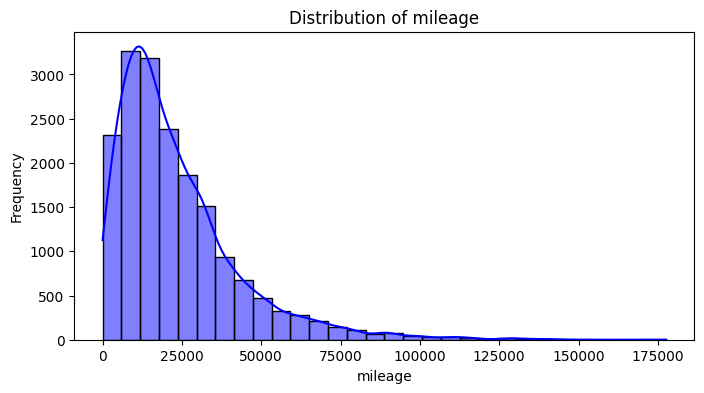

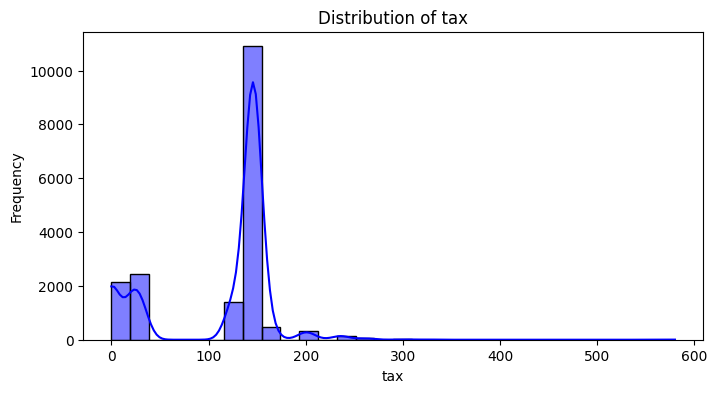

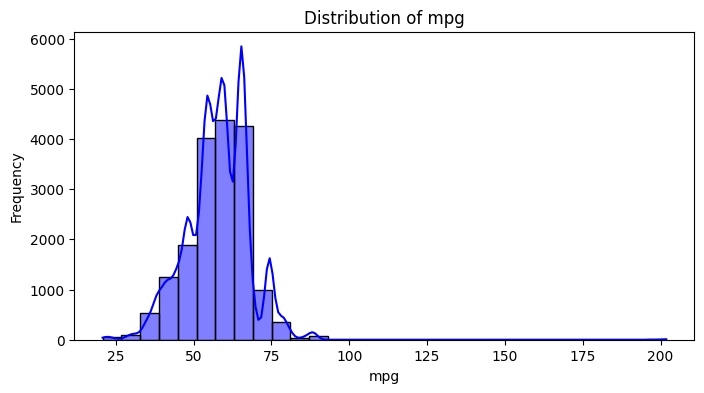

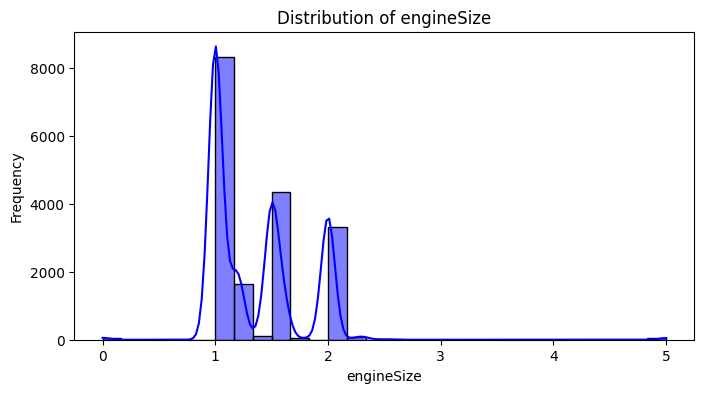

In [11]:
# Visualization Numeric coulmns
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

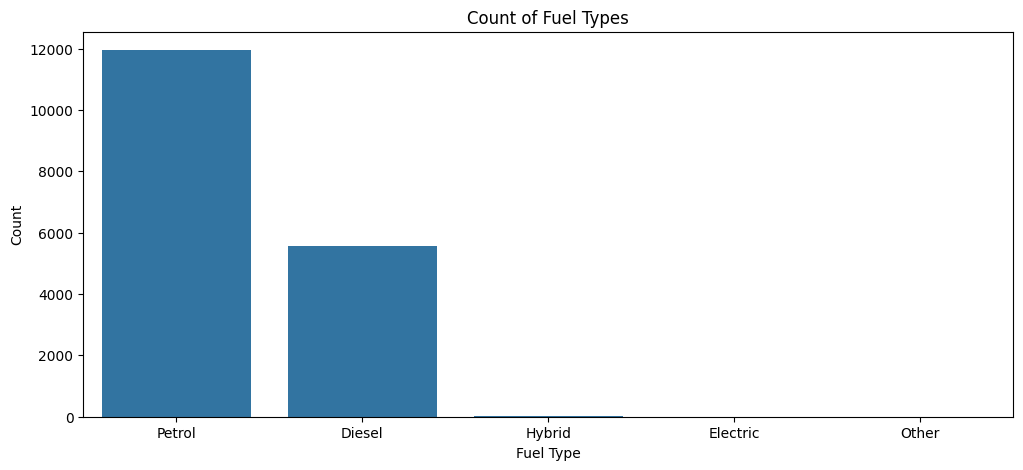

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data_cleaned, x='fuelType', order=data_cleaned['fuelType'].value_counts().index)
plt.title("Count of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

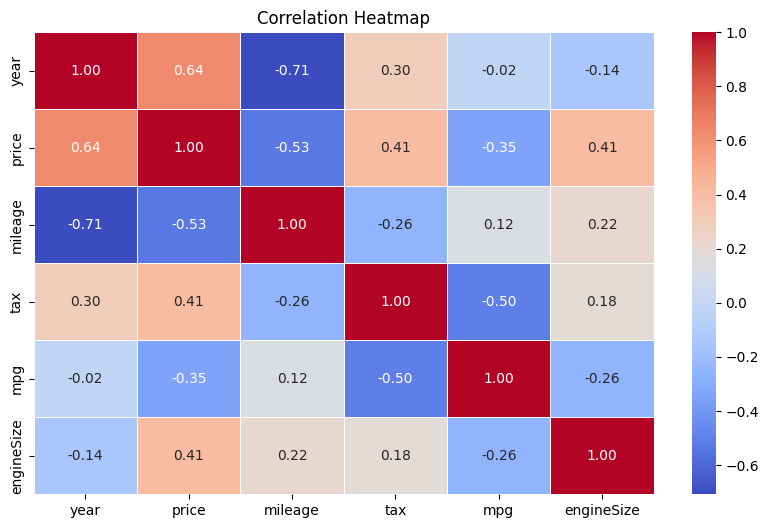

In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Feature Engineering**

In [14]:
X = data_cleaned.drop(columns='price')
y = data_cleaned['price']

In [15]:
categorical_features = ['model', 'transmission', 'fuelType']
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [16]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [17]:
# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# **Model Build**

In [18]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model Training
model = RandomForestRegressor(random_state=42, n_estimators=100)

In [20]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [21]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [22]:
# Predict on test data
y_pred = pipeline.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model trained with MSE: {mse:.2f}, R^2: {r2:.4f}")

Model trained with MSE: 1389316.31, R^2: 0.9202


# **Hyperparameter Tuning**

In [24]:
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10,],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage',
                                                                          'tax',
                                                                          'mpg',
                                                                          'engineSize']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['model',
                                                                          'transmission',
                                                                          'fuelType'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [25]:
print("Best parameters from Grid Search:")
print(grid_search.best_params_)

Best parameters from Grid Search:
{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [26]:
# Evaluate the optimized model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

In [27]:
print(f"Optimized Model MSE: {mse_optimized:.2f}, R^2: {r2_optimized:.4f}")

Optimized Model MSE: 1325147.36, R^2: 0.9239


# **Actual vs Predicted**

In [28]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})
print(actual_vs_predicted.head())


       Actual     Predicted
17814   17999  17153.006000
10746   11699  11285.613107
13737    6634   7351.273401
11073   13880  13939.401615
5587     8820   7801.595095


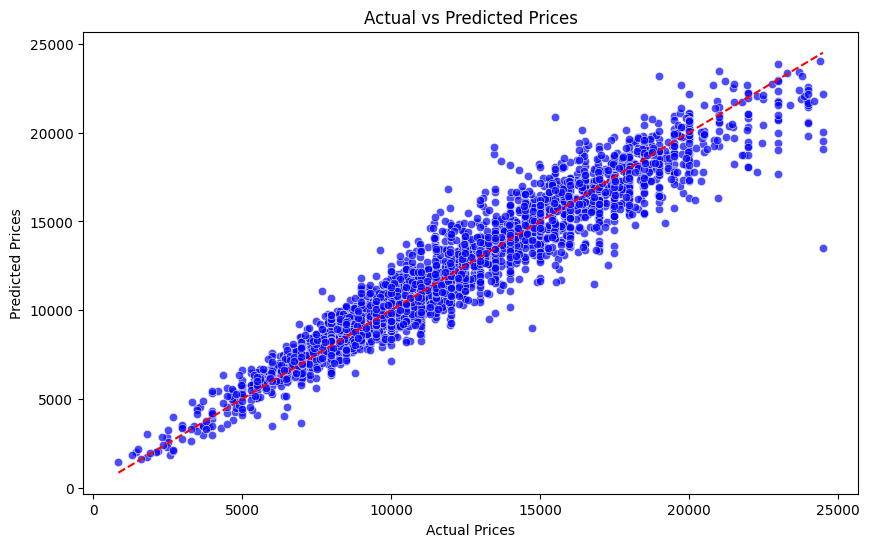

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([actual_vs_predicted.min().min(), actual_vs_predicted.max().max()],
         [actual_vs_predicted.min().min(), actual_vs_predicted.max().max()],
         color='red', linestyle='--')  # Line of perfect prediction
plt.show()

# **Save Model**

In [30]:
model_filename = "car_price_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)